In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Here we have to import the required libraries

In [101]:
train_df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


Read the csv file for the dataset

In [102]:
train_df['subscribed'].replace('no',0,inplace=True)
train_df['subscribed'].replace('yes',1,inplace=True)

Need to convert the subscribed as this is categorical data in data set

In [103]:
train_df['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [104]:
train_df.shape

(31647, 18)

In [105]:
train_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [106]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Need to check the null values in data set

In [107]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [108]:
train_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,1


In [109]:
categorical_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Numerical Columns:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'subscribed']


Need to check the categorical data and numerical data. Categorical data should be converted into numerical data

In [110]:
train_df=pd.get_dummies(train_df).astype(int)
train_df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,1,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Created dummy data set to proceed further

In [112]:
train_df.skew()

ID                      0.005851
age                     0.681607
balance                 7.995696
day                     0.087185
duration                3.199766
campaign                4.873935
pdays                   2.642374
previous               49.302348
subscribed              2.377445
job_admin.              2.417838
job_blue-collar         1.378918
job_entrepreneur        5.332113
job_housemaid           5.765495
job_management          1.425658
job_retired             4.142471
job_self-employed       5.021947
job_services            2.828999
job_student             6.845635
job_technician          1.779055
job_unemployed          5.656990
job_unknown            12.273836
marital_divorced        2.418326
marital_married        -0.422650
marital_single          0.969418
education_primary       1.939498
education_secondary    -0.050640
education_tertiary      0.904899
education_unknown       4.596716
default_no             -7.149903
default_yes             7.149903
housing_no

In [113]:
train_df.drop(['day'], axis=1, inplace=True)

In [30]:
train_df.drop(['education'], axis=1, inplace=True)

In [115]:
train_df.describe()

,ID,age,balance,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,...,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,258.113534,2.765697,39.576042,0.574272,0.117389,0.114734,0.216197,...,0.118115,0.010807,0.305527,0.087939,0.016178,0.012955,0.106234,0.040699,0.033747,0.819319
std,13075.936990,10.625134,3028.304293,257.118973,3.113830,99.317592,2.422529,0.321888,0.318706,0.411657,...,0.322750,0.103394,0.460637,0.283210,0.126164,0.113084,0.308142,0.197595,0.180581,0.384759
min,2.000000,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,73.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,22519.000000,39.000000,450.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,33879.500000,48.000000,1431.000000,318.500000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,45211.000000,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
train_df.head()

,ID,age,balance,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,44,2,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,91,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,240,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,867,1,84,3,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

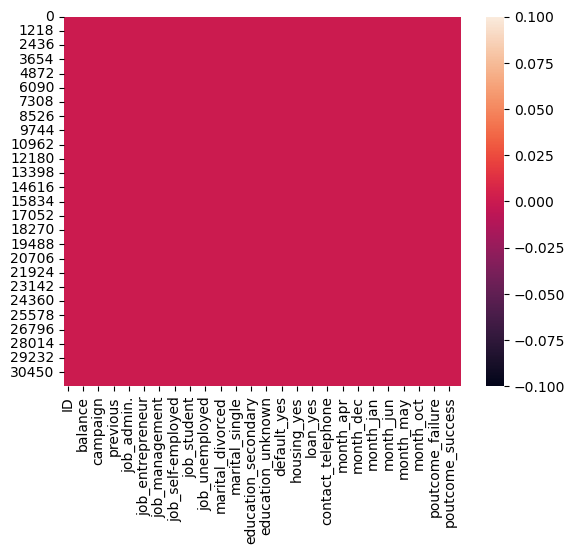

In [117]:
sns.heatmap(train_df.isnull())

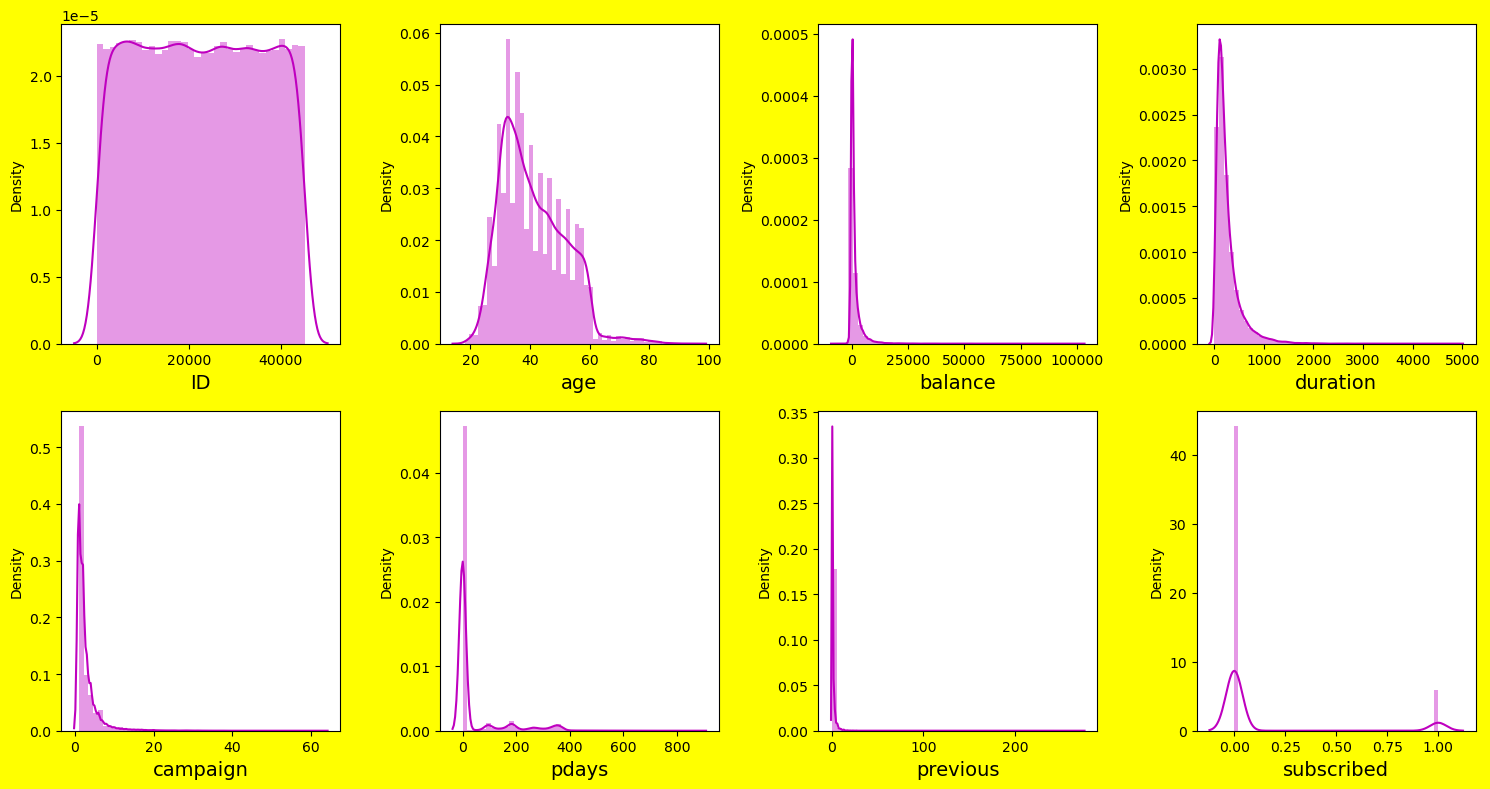

In [118]:
plt.figure(figsize=(15,8), facecolor= "yellow")
plotnumber=1
for col in train_df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(train_df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Created the plots to check the skewness. Created boxplot, distplot and heatplot map

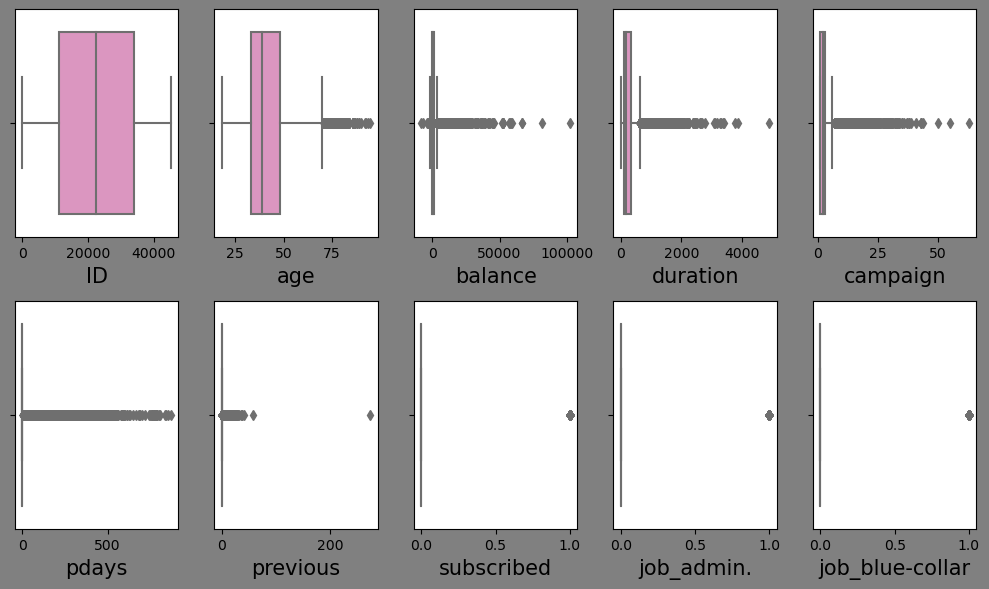

In [119]:
plt.figure(figsize=(10,6), facecolor= 'Grey')
plotnumber=1
for col in train_df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(train_df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

In [120]:
cor= train_df.corr()
cor

,ID,age,balance,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
ID,1.000000,0.013337,0.067897,0.007183,-0.103508,0.436148,0.254476,0.296663,0.018790,-0.121656,...,-0.208083,0.114475,-0.238047,0.118076,0.178456,0.180922,0.329756,0.209052,0.265963,-0.496277
age,0.013337,1.000000,0.103245,-0.003870,0.005733,-0.021947,0.005761,0.024538,-0.055530,-0.046797,...,0.048587,0.022598,-0.128285,0.036428,0.058387,0.040462,-0.005755,-0.015908,0.029112,-0.000885
balance,0.067897,0.103245,1.000000,0.024274,-0.012032,0.001789,0.013843,0.050807,-0.030051,-0.051048,...,0.035545,0.025238,-0.069464,0.116274,0.040273,0.013423,0.011361,0.009141,0.028584,-0.027209
duration,0.007183,-0.003870,0.024274,1.000000,-0.080305,0.000529,0.001783,0.389838,-0.012764,0.008423,...,-0.016949,-0.008491,0.007397,-0.008458,0.013256,0.015145,-0.016621,-0.002115,0.036574,-0.002768
campaign,-0.103508,0.005733,-0.012032,-0.080305,1.000000,-0.087570,-0.033151,-0.070607,-0.019145,0.011835,...,0.048353,-0.019126,-0.066412,-0.084276,-0.050919,-0.038044,-0.087085,-0.020246,-0.057645,0.107196
pdays,0.436148,-0.021947,0.001789,0.000529,-0.087570,1.000000,0.428938,0.108290,0.032793,0.014206,...,-0.114253,0.037521,0.075042,0.012283,0.056424,0.072536,0.698224,0.393408,0.229305,-0.868844
previous,0.254476,0.005761,0.013843,0.001783,-0.033151,0.428938,1.000000,0.088081,0.016241,-0.017275,...,-0.059557,0.023289,0.002417,0.038587,0.049107,0.061083,0.327826,0.297019,0.189952,-0.504232
subscribed,0.296663,0.024538,0.050807,0.389838,-0.070607,0.108290,0.088081,1.000000,0.007935,-0.074922,...,-0.016972,0.127090,-0.103581,-0.017918,0.127530,0.124028,0.011577,0.032693,0.309125,-0.171144
job_admin.,0.018790,-0.055530,-0.030051,-0.012764,-0.019145,0.032793,0.016241,0.007935,1.000000,-0.189074,...,-0.007028,0.008401,0.027257,-0.011660,0.011989,0.004348,0.019712,0.015165,0.016726,-0.031425
job_blue-collar,-0.121656,-0.046797,-0.051048,0.008423,0.011835,0.014206,-0.017275,-0.074922,-0.189074,1.000000,...,0.015663,-0.043016,0.171407,-0.049513,-0.043012,-0.041842,-0.002455,-0.002122,-0.053518,0.028174


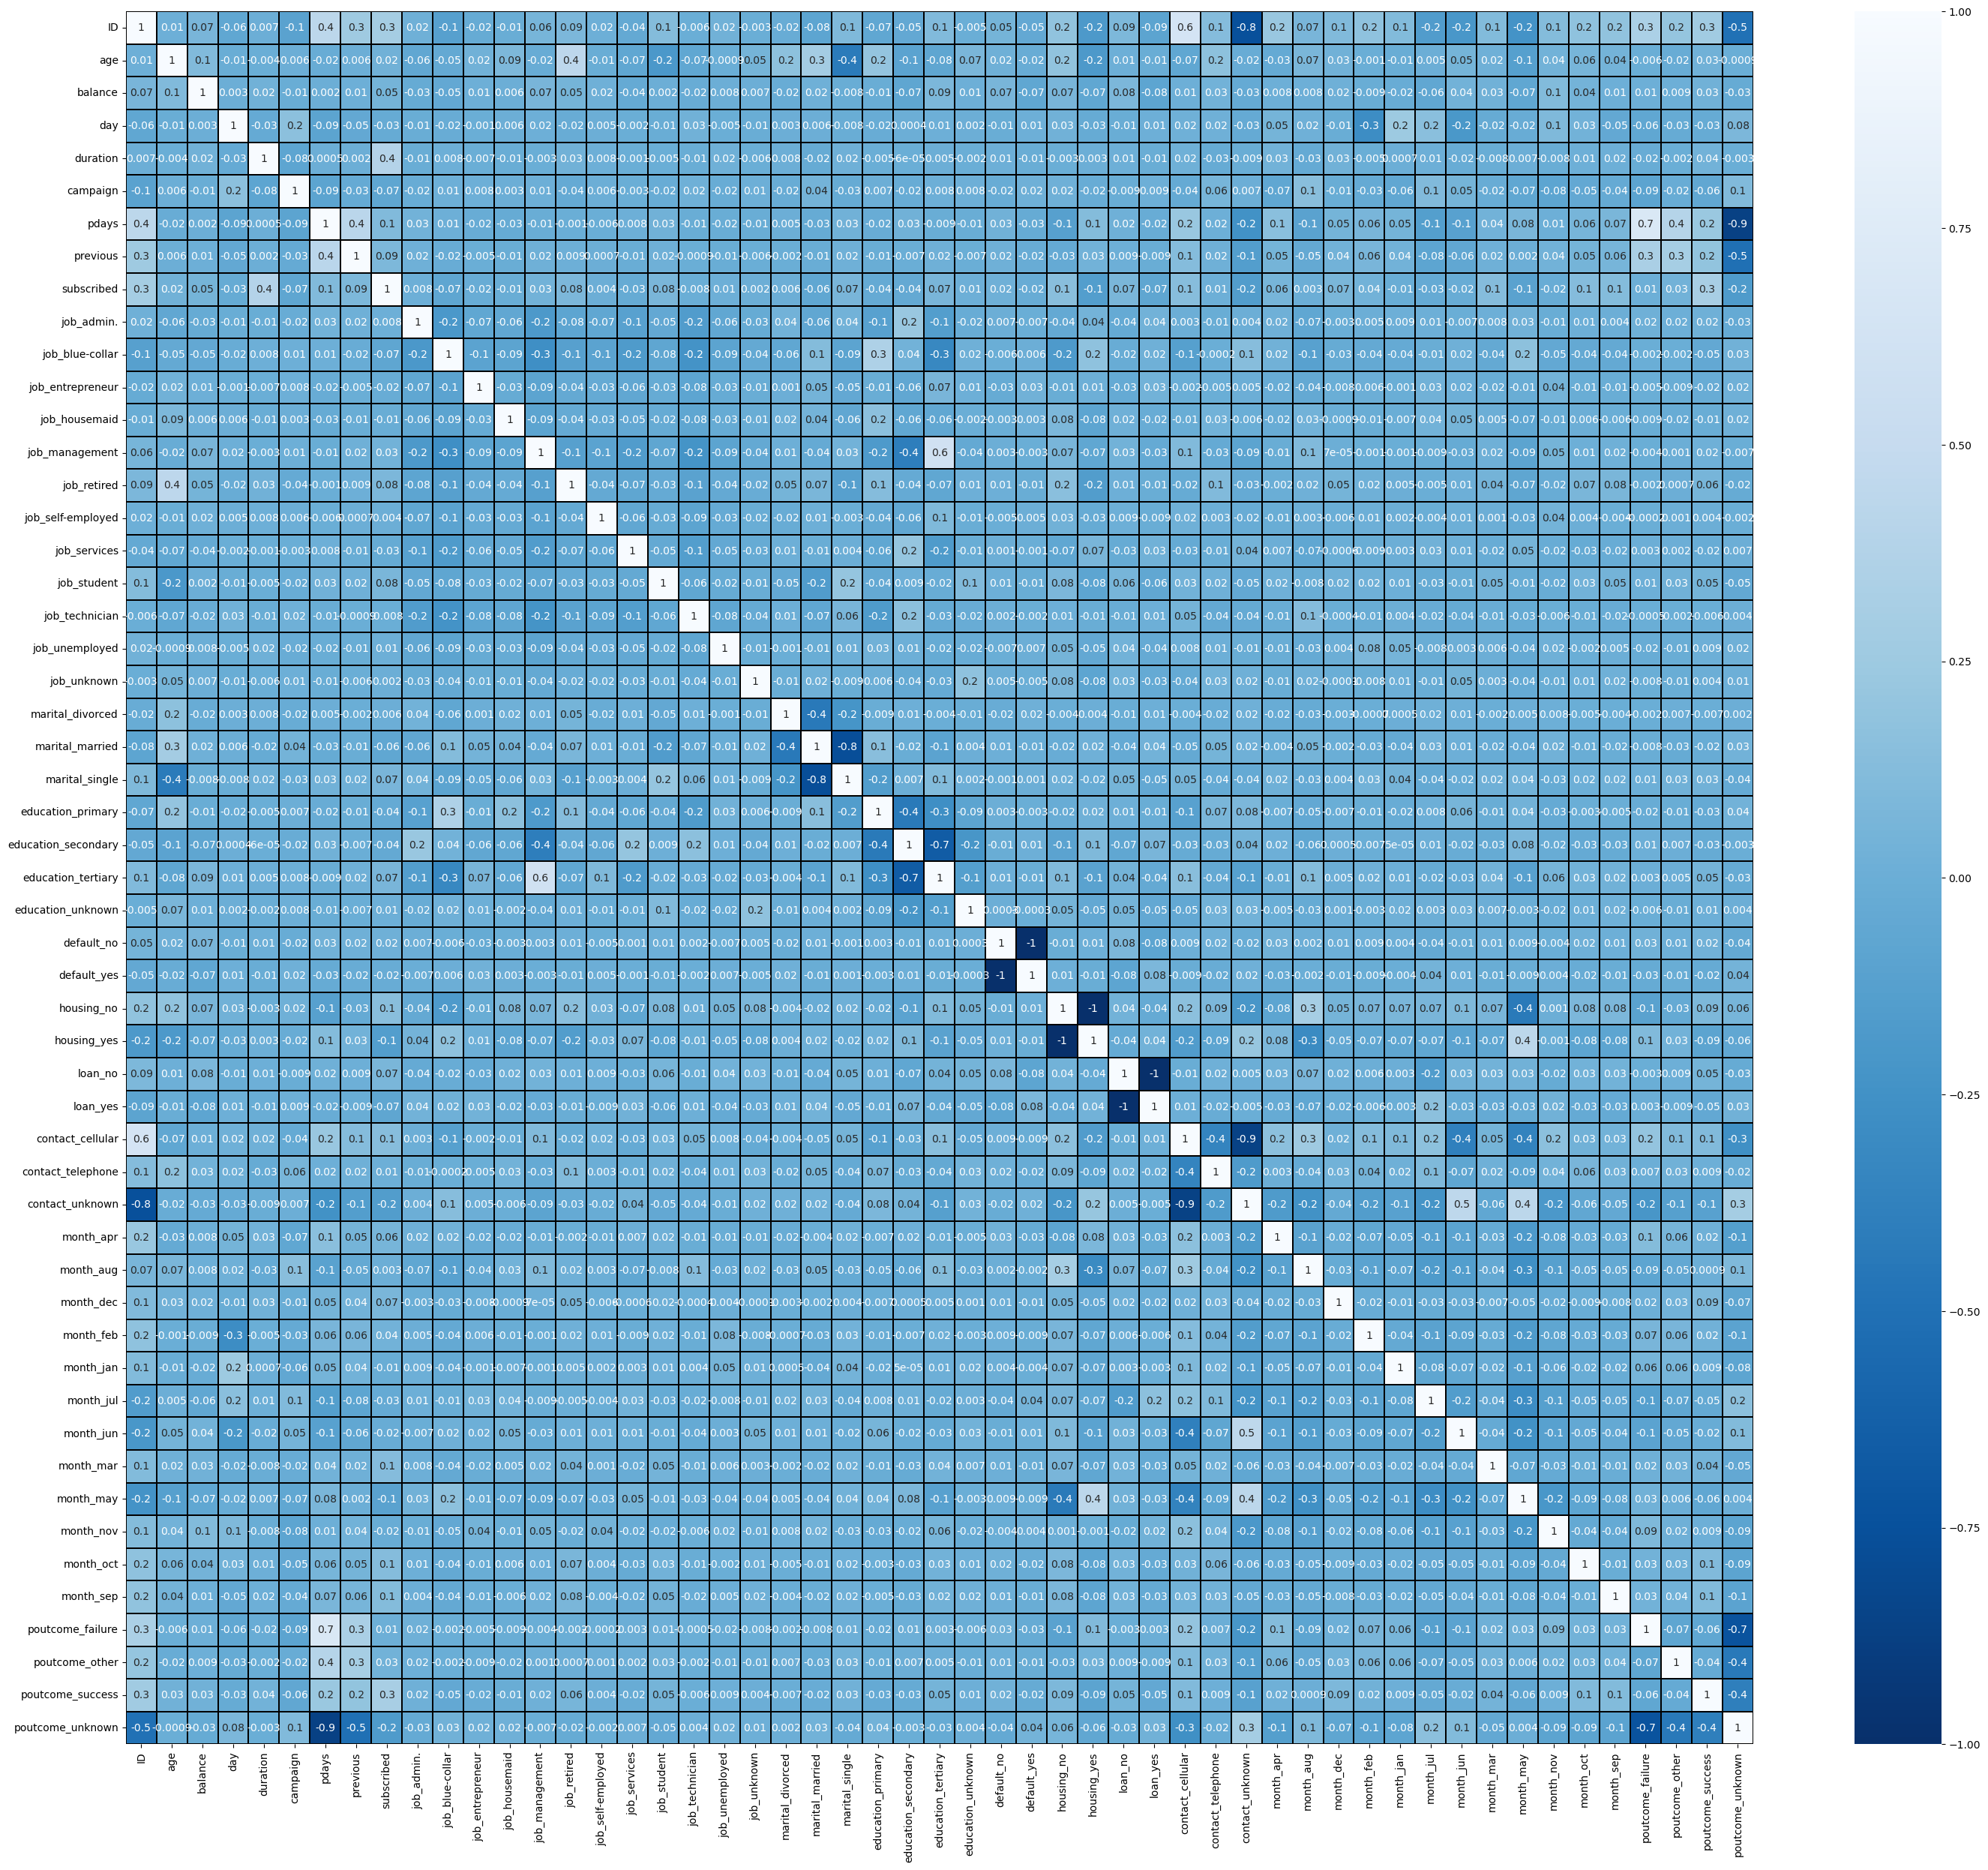

In [83]:
plt.figure(figsize=(35,30))
sns.heatmap(train_df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

Checking the cordination between the dataset

In [121]:
test_df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [122]:
y=train_df['subscribed']
x=train_df.drop('subscribed',axis=1)

In [123]:
train_df.head()

,ID,age,balance,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,44,2,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,91,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,240,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,867,1,84,3,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [124]:
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [125]:
train_df.shape

(31647, 52)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [127]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

Creating models such as RFC, ET, GB as below

In [128]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC=RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.909952606635071
[[5427  172]
 [ 398  333]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.66      0.46      0.54       731

    accuracy                           0.91      6330
   macro avg       0.80      0.71      0.74      6330
weighted avg       0.90      0.91      0.90      6330



In [129]:
GB=GradientBoostingClassifier() 
GB.fit(X_train, y_train)
predGB=GB.predict(X_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9085308056872038
[[5379  220]
 [ 359  372]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5599
           1       0.63      0.51      0.56       731

    accuracy                           0.91      6330
   macro avg       0.78      0.73      0.76      6330
weighted avg       0.90      0.91      0.90      6330



In [130]:
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train) 
predET=ET.predict(X_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9007898894154819
[[5419  180]
 [ 448  283]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5599
           1       0.61      0.39      0.47       731

    accuracy                           0.90      6330
   macro avg       0.77      0.68      0.71      6330
weighted avg       0.89      0.90      0.89      6330



In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 
              'random_state':[10, 50, 1000], 
              'max_depth':[0, 10, 20],
            'n_jobs':[-2, -1, 1],
              'n_estimators':[50, 100, 200, 300]}

In [133]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [134]:
final=RFC.predict(X_test)


In [135]:
from sklearn.metrics import accuracy_score

In [136]:
accuracy_score(y_test,final)

0.909952606635071

In [137]:
test_df=pd.get_dummies(test_df).astype(int)
test_df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [141]:
train_df.shape

(31647, 52)

In [142]:
test_df.shape

(13564, 52)

In [143]:
train_df.drop(['ID'], axis=1, inplace=True)

In [146]:
test_df.drop(['ID'], axis=1, inplace=True)

In [144]:
train_df.shape

(31647, 51)

In [147]:
test_df.shape

(13564, 51)

In [148]:
pred = GB.predict(test_df)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [149]:
import joblib
joblib.dump(GB,"subscribed.pkl")

['subscribed.pkl']

In [150]:
model = joblib.load("subscribed.pkl")
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
result=pd.DataFrame()

In [156]:
result['subscribed']=pred

In [157]:
result['subscribed']

0        0
1        0
2        1
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    0
13563    0
Name: subscribed, Length: 13564, dtype: int32

Here we have predicted the subscribed in bank markedting dataset